# Stroke Predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# Drop ID since we think it isn't necessary
df.drop('id', axis = 1, inplace = True)

In [3]:
# Show info about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
# Show statistical information about the dataframe
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Percentage of unknown BMI values that had strokes
len(df[df.bmi.isnull()].query("stroke == 1"))/ len(df[df.bmi.isnull()])


0.19900497512437812

In [6]:
# Percentage of known BMI values that had strokes
len(df.dropna(subset=['bmi']).query("stroke == 1"))/len(df.dropna(subset=['bmi']))

0.04257486249745366

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [9]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [10]:
len(df)

5110

In [11]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
len(df.query("smoking_status == 'Unknown'"))

1544

In [13]:
df.groupby('smoking_status').stroke.value_counts()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

In [14]:
def percent_smoker_stroke(df, col):
    each = df.groupby('smoking_status').stroke.value_counts()[col]
    return each[1]/sum(each)

In [15]:
def percent_smoker_total(df, col):
    each = df.groupby('smoking_status').stroke.value_counts()[col]
    return each[1]/len(df)

In [16]:
for each in df.smoking_status.value_counts().index:
    print(f"Total % Positive that are {each}: {percent_smoker_total(df, each)}")
    

Total % Positive that are never smoked: 0.01761252446183953
Total % Positive that are Unknown: 0.009197651663405087
Total % Positive that are formerly smoked: 0.0136986301369863
Total % Positive that are smokes: 0.00821917808219178


In [17]:
for each in df.smoking_status.value_counts().index:
    print(f"% Positive within {each}: {percent_smoker_stroke(df, each)}")

% Positive within never smoked: 0.04756871035940803
% Positive within Unknown: 0.03044041450777202
% Positive within formerly smoked: 0.07909604519774012
% Positive within smokes: 0.053231939163498096


Handling unknown values in the smoking_status column.

In [18]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [21]:
df.query("(age <= 40) & (stroke ==1)")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
49,Female,39.00,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
118,Female,38.00,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
133,Female,38.00,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
182,Female,32.00,0,0,Yes,Private,Rural,76.13,29.9,smokes,1
210,Female,39.00,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
228,Female,39.00,0,0,Yes,Self-employed,Urban,97.76,29.6,smokes,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [22]:
import matplotlib.pyplot as plt

/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


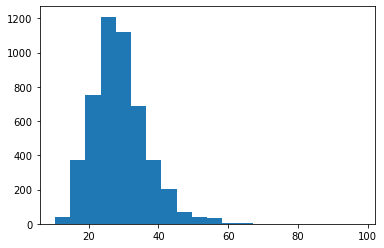

In [23]:
plt.hist(df.bmi, bins = 20);

In [24]:
df.query("(bmi <= 30) & (stroke ==1)")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
234,Male,78.0,0,0,Yes,Self-employed,Urban,218.46,26.8,Unknown,1
238,Female,51.0,1,0,Yes,Private,Urban,88.20,28.4,never smoked,1
240,Male,66.0,0,0,Yes,Private,Rural,76.46,21.2,formerly smoked,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [25]:
def all_value_counts(df):
    for each in df.columns:
        print(f"---------\nFeature: {each}\n{df[each].value_counts()}")

In [26]:
all_value_counts(df)

---------
Feature: gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---------
Feature: age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64
---------
Feature: hypertension
0    4612
1     498
Name: hypertension, dtype: int64
---------
Feature: heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
---------
Feature: ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
---------
Feature: work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---------
Feature: Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---------
Feature: avg_glucose_level
93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02     1
Nam

In [27]:
df = df.query("(gender == 'Male') | (gender == 'Female')")

In [28]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Instead of filling all the NAs in BMI as 0, we decided to categorize the BMI according to the official National Heart, Lung and Blood Institute BMI chart. For NA values, we encoded them as Unknown.

In [29]:
conditions = [(df.bmi < 18.5),
             (df.bmi < 24.9),
             (df.bmi < 29.9),
             (df.bmi > 30)]

choices = ['underweight', 'normal', 'overweight', 'obese']

df['bmi_cat'] = np.select(conditions, choices, 'unknown')

<ipython-input-29-503940686bb4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_cat'] = np.select(conditions, choices, 'unknown')


In [30]:
df.drop('bmi', axis = 1, inplace = True)

/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_cat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,unknown
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,normal
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,obese
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,obese
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,overweight


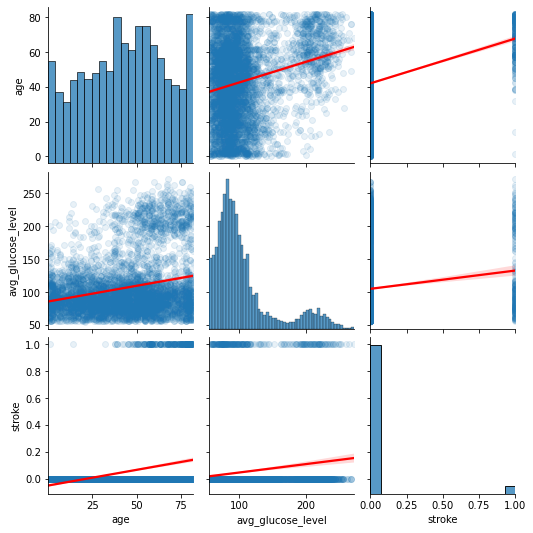

In [32]:
sns.pairplot(df[['age', 'avg_glucose_level', 'stroke']],kind='reg',plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}} )

Not much findings besides the distributions of each feature. 

In [33]:
cat_features = df.drop(['age', 'avg_glucose_level'], axis=1).columns
num_features = df[['age', 'avg_glucose_level']].columns
df[num_features].corr()

,age,avg_glucose_level
age,1.000000,0.238323
avg_glucose_level,0.238323,1.000000


In [34]:
def stacked_plots(df, feature):
    return sns.histplot(data=df[feature], stat="count", multiple="stack",
             x=df[feature], kde=False,
             palette="pastel", hue=df.stroke,
             element="bars", legend=True)

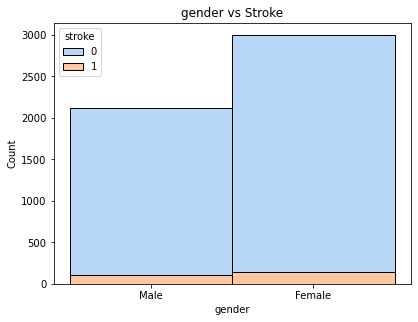

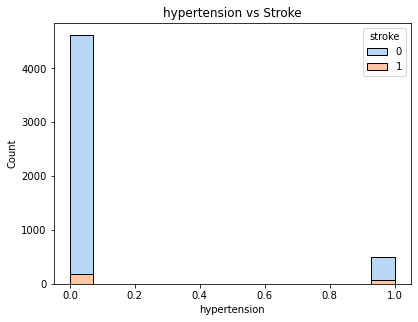

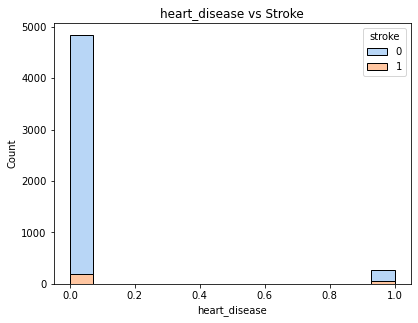

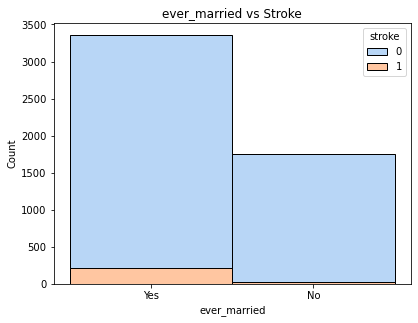

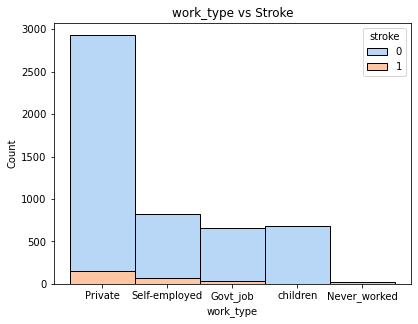

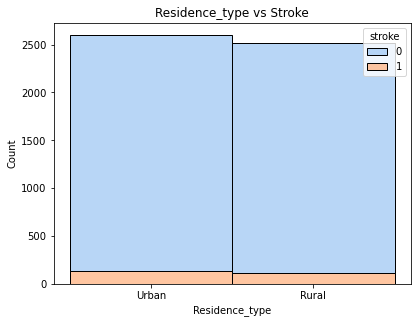

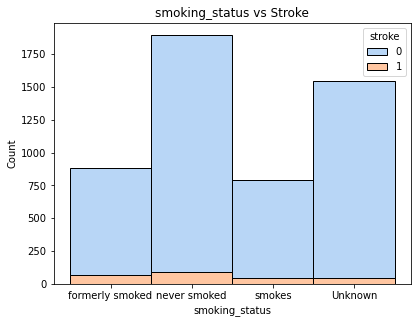

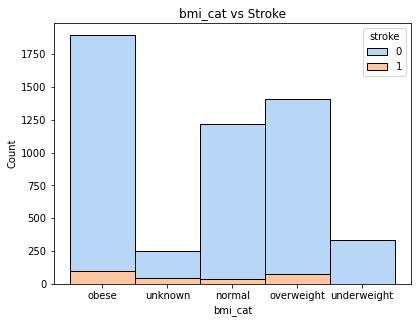

In [43]:
for each in cat_features:
    if each == 'stroke': continue
    fig, ax = plt.subplots()
    ax = stacked_plots(df, each)
    ax.set_title(f'{each} vs Stroke')

In [36]:
df2 = df.copy()
df2['age_bin'] = pd.qcut(df2['age'], q=10, precision=1)
df2['avg_glucose_level_bin'] = pd.qcut(df2['avg_glucose_level'], q=10, precision=1)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_cat,age_bin,avg_glucose_level_bin
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,obese,"(65.0, 75.0]","(192.2, 271.7]"
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,unknown,"(57.0, 65.0]","(192.2, 271.7]"
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,obese,"(75.0, 82.0]","(98.9, 108.5]"
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,obese,"(45.0, 51.0]","(124.1, 192.2]"
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,normal,"(75.0, 82.0]","(124.1, 192.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,unknown,"(75.0, 82.0]","(80.0, 85.6]"
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,obese,"(75.0, 82.0]","(124.1, 192.2]"
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,obese,"(30.0, 38.0]","(80.0, 85.6]"
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,overweight,"(45.0, 51.0]","(124.1, 192.2]"


In [37]:
from statsmodels.graphics.mosaicplot import mosaic

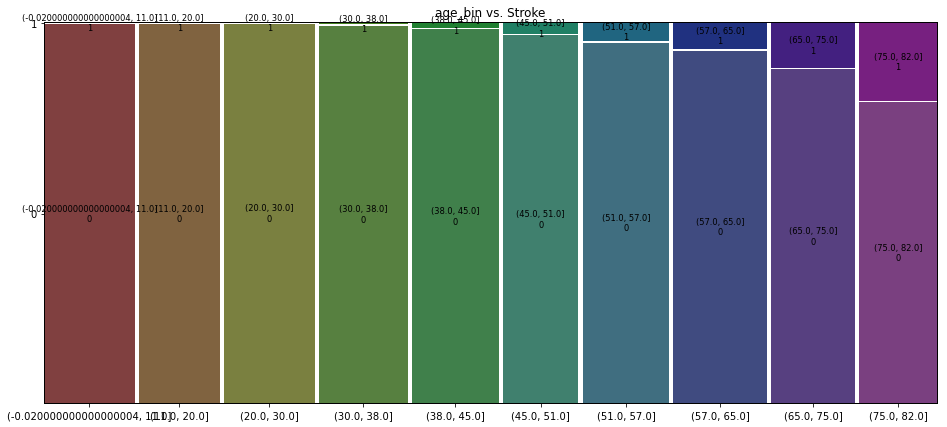

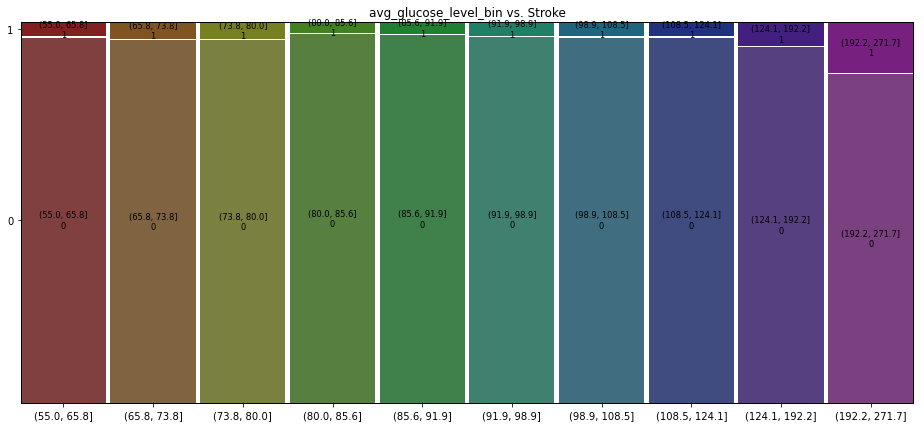

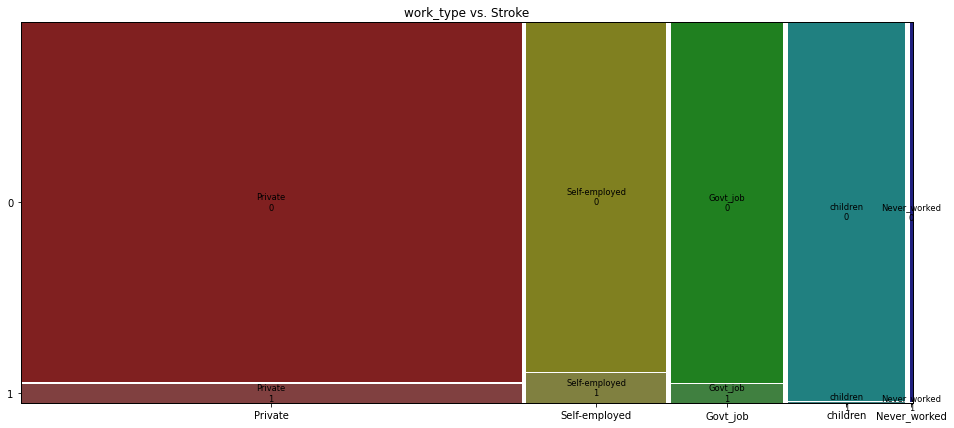

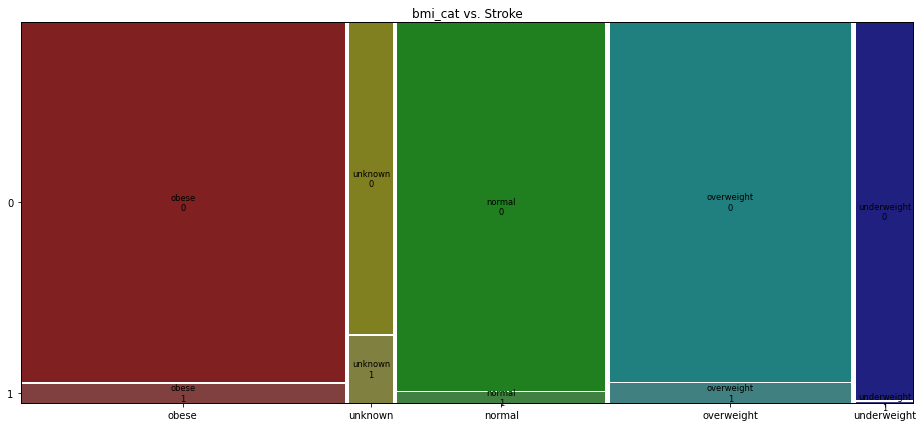

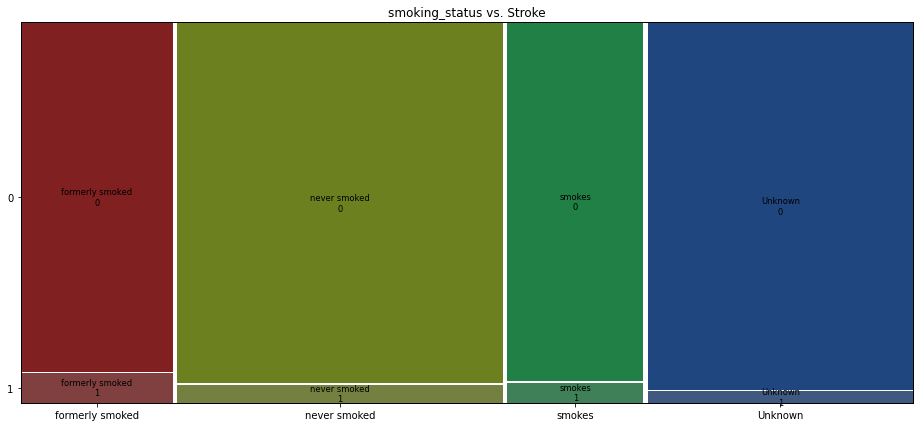

In [38]:
for col in ['age_bin', 'avg_glucose_level_bin', 'work_type', 'bmi_cat', 'smoking_status']:
    plt.rcParams["figure.figsize"] = (16,7)
    mosaic(df2, [col, 'stroke'], title=col+' vs. Stroke')
    plt.show()
    
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

From the above plots, we can clearly see a relationship between age & likelihood of stroke. Average glucose level seems to be steady up until a certain point, at which it becomes more likely for a person to have had a stroke. The BMI category 'unknown' interestingly has the largest proportion of strokes, and both 'obese' and 'overweight' have slightly elevated risks compared to 'underweight' and 'normal'. 

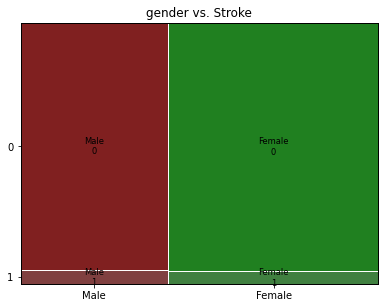

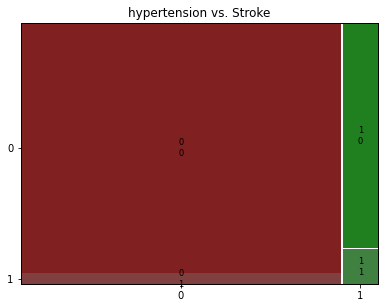

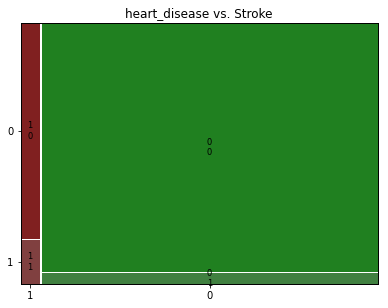

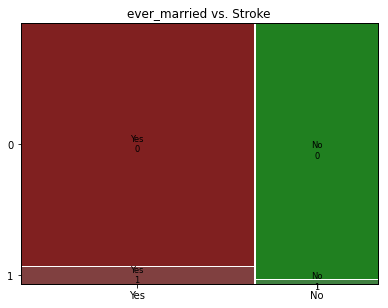

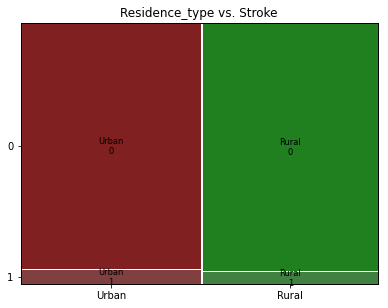

In [39]:
for col in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']:
    mosaic(df2, [col, 'stroke'], title=col+' vs. Stroke')

In [40]:
import pickle

pickle_out = open('pickled_files/df.pickle',"wb")
pickle.dump(df, pickle_out)
pickle_out.close()

In [41]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_cat_obese,bmi_cat_overweight,bmi_cat_underweight,bmi_cat_unknown
0,67.0,0,1,228.69,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0
1,61.0,0,0,202.21,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,80.0,0,1,105.92,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0
3,49.0,0,0,171.23,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0
4,79.0,1,0,174.12,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
5106,81.0,0,0,125.20,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
5107,35.0,0,0,82.99,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
5108,51.0,0,0,166.29,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0


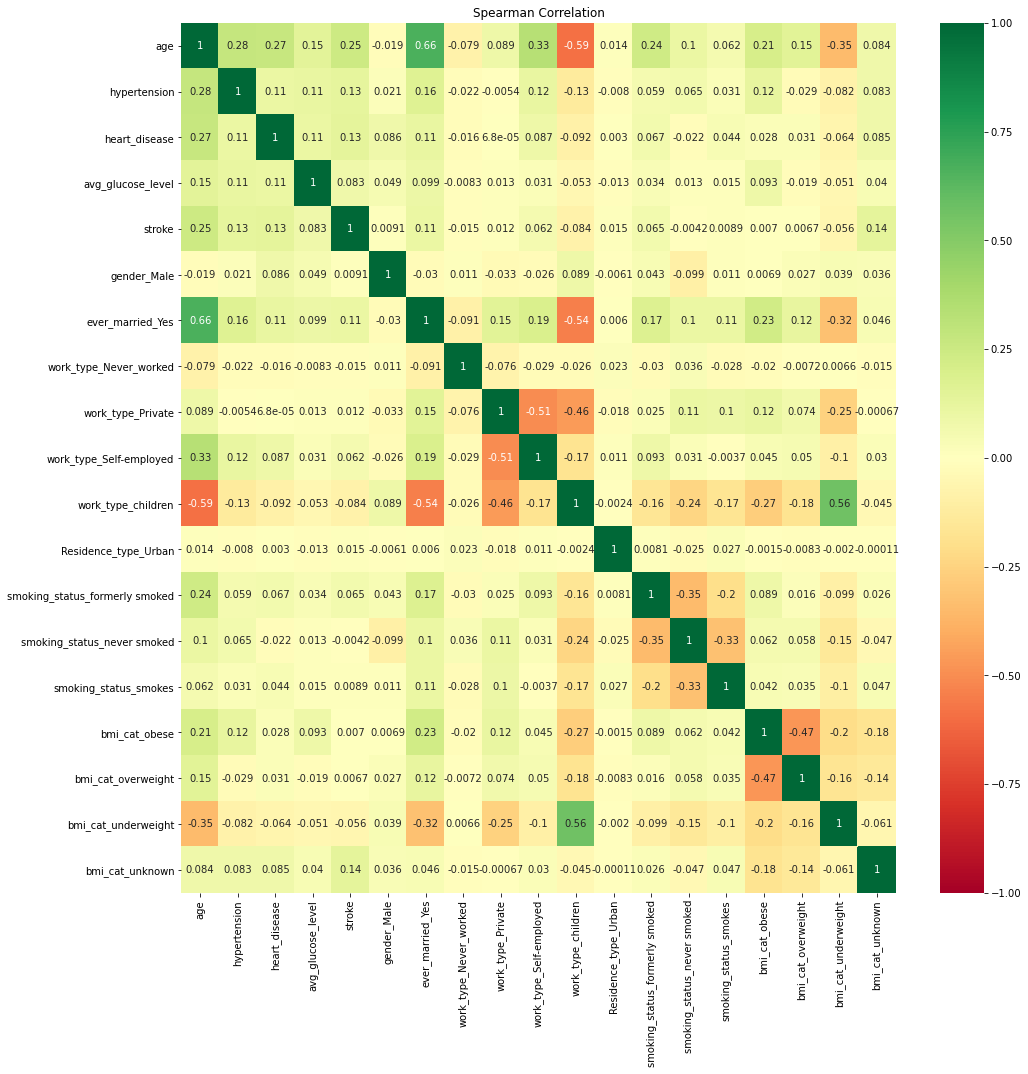

In [42]:
corr_spearman = df_dummies.corr(method='spearman')

fig = plt.figure(figsize=(16,16))
sns.heatmap(corr_spearman, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

There don't seem to be any major mulitcollinearity issues since the strongest correlation is 0.66 between "ever married" and "age". This is interesting, as we would expect to see some sort of correlation between health indicators such as hypertension, heart disease, and higher category BMI. 